In [1]:
from graphviz import Digraph

In [2]:
from micrograd.engine import Value

In [3]:
def trace(root):
    #builds all nodes and edges
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                # edge from child to v
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

In [4]:
def draw_dot(root):

    dot = Digraph(format = 'svg', graph_attr = {'rankdir' : 'LR'})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        #create a rectangle for all nodes
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:

            #if node is a result of some operation
            dot.node(name = uid + n._op, label = n._op)
            #connect this node
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # n1 to op of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

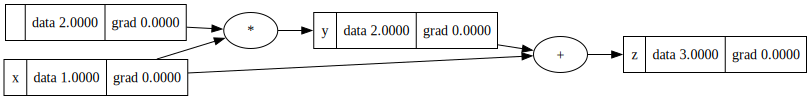

In [10]:
''' Basic example involving addition and multiplication'''

x = Value(1.0, label = 'x')
y = 2 * x; y.label = 'y'
z = x + y; z.label = 'z'

draw_dot(z)

In [5]:
''' Example involving basic Neuron (back propagation && gradient descent)'''

# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

#bias
b = Value(6.8813735, label = 'b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

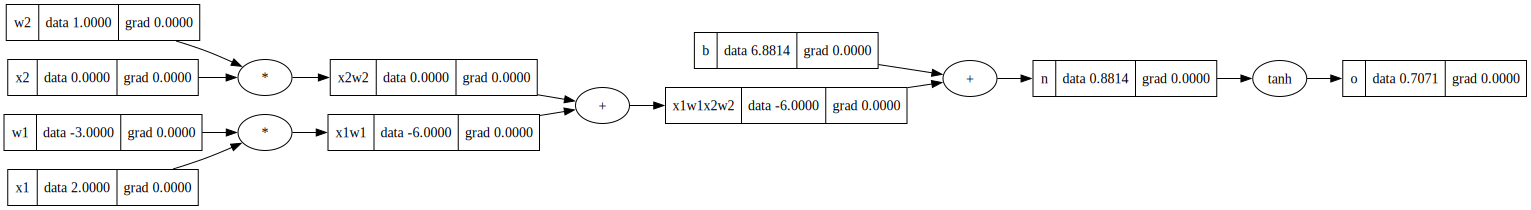

In [6]:
draw_dot(o)

In [7]:
''' Manual Gradient Calculation'''

# x1.grad = w1.data * x1w1.grad  : do/dx1
# w1.grad = x1.data * x1w1.grad  : do/dw1

# x2.grad = w2.data * x2w2.grad  : do/dx2
# w2.grad = x2.data * x2w2.grad  : do/dw2

# Need to determine how Outout (O) changes with respect to different variables

' Manual Gradient Calculation'

In [8]:
o.backward()  #calculates grad 

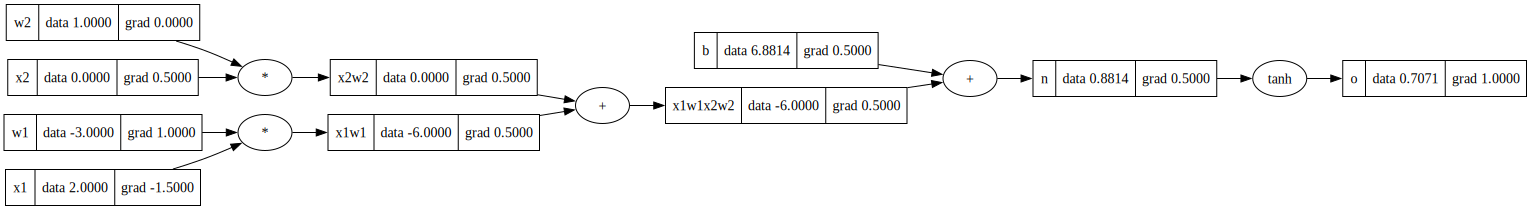

In [9]:
draw_dot(o)  # gradient values are updated